# Preparation of the Data

In [1313]:
import pandas as pd
import numpy as np

In [1314]:
df = pd.read_csv('data/train.csv', sep=",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineering

Show which columns contain NaN

In [1315]:
for column in df.columns:
    print(f"NaN in {column}:", df[column].isna().values.any())

NaN in PassengerId: False
NaN in Survived: False
NaN in Pclass: False
NaN in Name: False
NaN in Sex: False
NaN in Age: True
NaN in SibSp: False
NaN in Parch: False
NaN in Ticket: False
NaN in Fare: False
NaN in Cabin: True
NaN in Embarked: True


### OneHotEncoder for Sex

In [1316]:
df = pd.get_dummies(df,prefix=['Sex'], columns = ['Sex'], drop_first=True)
# df

### Pipeline of OHE and Imputation for Embarked

In [1317]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

impute_and_encode = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                  OneHotEncoder(sparse=False)
                                 )

In [1318]:
impute_and_encode.fit(df[["Embarked"]])
t = impute_and_encode.transform(df[["Embarked"]])
embarked_matrix = pd.DataFrame(t, columns=impute_and_encode[1].get_feature_names())
df = pd.concat([df, embarked_matrix], axis=1).drop(["Embarked"], axis=1)

### Fare

In [1323]:
df["Fare"] = np.log(df["Fare"] + 1)

In [1324]:
df["Fare"]

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: Fare, Length: 891, dtype: float64

### Names

In [1325]:
df['rank'] = df['Name'].str.split('([A-Za-z]+)(\.)', expand=True)[1]

In [1326]:
titles = df["rank"].unique().tolist()
rank = [3,2,1,7,7,4,4,2,2,7,5,6,1,7,7,5,7]
rank = [3,2,1,9,10,4,5,2,2,11,6,8,1,12,13,7,14]
dic = {}
for title, rank in zip(titles, rank):
    dic[title] = rank
df["rank"].replace(dic, inplace=True)

### Cabin

In [1327]:
import re

In [1328]:
df["Cabin"] = df["Cabin"].fillna("Z0")

In [1329]:
result = df["Cabin"].astype(str).str[0]
df["deck"] = result.replace({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 1, "Z": 4})

In [1330]:
df["cabin_number"] = df["Cabin"].str.split('([A-Za-z]+)(\d+)', expand=True)[2]
df["cabin_number"].fillna("0", inplace=True)

### Imputation for Age

In [1331]:
for row, value in df.loc[df["Age"] != type(float)]["Pclass"].iteritems():
    df.loc[row, "Age"] = df.loc[df["Pclass"] == value]["Age"].median()

In [1334]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,x0_C,x0_Q,x0_S,rank,deck,cabin_number
0,1,0,3,"Braund, Mr. Owen Harris",24.0,1,0,A/5 21171,2.110213,Z0,1,0.0,0.0,1.0,3,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",37.0,1,0,PC 17599,4.280593,C85,0,1.0,0.0,0.0,2,3,85
2,3,1,3,"Heikkinen, Miss. Laina",24.0,0,0,STON/O2. 3101282,2.188856,Z0,0,0.0,0.0,1.0,1,4,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",37.0,1,0,113803,3.990834,C123,0,0.0,0.0,1.0,2,3,123
4,5,0,3,"Allen, Mr. William Henry",24.0,0,0,373450,2.202765,Z0,1,0.0,0.0,1.0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",29.0,0,0,211536,2.639057,Z0,1,0.0,0.0,1.0,4,4,0
887,888,1,1,"Graham, Miss. Margaret Edith",37.0,0,0,112053,3.433987,B42,0,0.0,0.0,1.0,1,2,42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,W./C. 6607,3.196630,Z0,0,0.0,0.0,1.0,1,4,0
889,890,1,1,"Behr, Mr. Karl Howell",37.0,0,0,111369,3.433987,C148,1,1.0,0.0,0.0,3,3,148


### Scale Data

In [269]:
from sklearn.preprocessing import StandardScaler
x = df[["Pclass", "Age", "SibSp", "Parch", "Sex_male", "Fare"]].values #returns a numpy array
min_max_scaler = StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.concat([df.drop(["Pclass", "Age", "SibSp", "Parch", "Sex_male", "Fare"], axis=1), pd.DataFrame(x_scaled, columns=["Pclass", "Age", "SibSp", "Parch", "Sex_male", "Fare"])], axis=1)

## Defining the Feature Matrix and the Target Vector

In [1374]:
# X = df[["Pclass", "Age", "SibSp", "Parch", "Sex_male", "Fare", "rank", "cabin_number", "deck", "x0_C", "x0_Q", "x0_S"]]
X = df[["rank", "Sex_male", "SibSp", "cabin_number"]]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.65, test_size=0.35)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_train, y_train))
sklearn_score = clf.score(X_test, y_test)
print("sklearn_score", round(sklearn_score, 3))

0.8652849740932642
sklearn_score 0.833


In [1373]:
X.head()

,rank,Sex_male,SibSp,deck
0,3,1,1,4
1,2,0,1,3
2,1,0,0,4
3,2,0,1,3
4,3,1,0,4


### Splitting X and y into test and train sets

In [1384]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.65, test_size=0.35)

# Random Forest

### sklearn Random Forest

In [1376]:
from sklearn.ensemble import RandomForestClassifier

In [1382]:
clf = RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=20, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_train, y_train))
sklearn_score = clf.score(X_test, y_test)
print("sklearn_score", round(sklearn_score, 3))

0.8238341968911918
sklearn_score 0.827


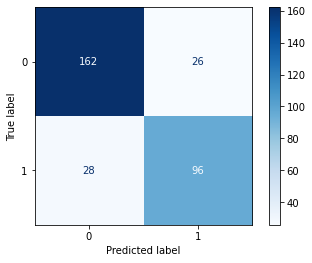

In [1378]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)

In [1381]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_accuracy = accuracy_score(dummy_clf.predict(X_test), y_test)
dummy_accuracy

0.6025641025641025

In [1386]:
from mlxtend.plotting import plot_decision_regions


Xa=X_train[["cabin_number", "rank"]].to_numpy()
ya=y_train.to_numpy()
fig = plt.figure(figsize=(10,8))

for t in zip([clf]):
    clf.fit(Xa, ya)
    fig = plot_decision_regions(X=Xa, y=ya, clf=clf, legend=1)
plt.title('Decision Boundary', fontsize=17)
plt.xlabel("cabin_number", fontsize=15)
plt.ylabel("rank", fontsize=15)
plt.show()

[['0' 3]
 ['0' 3]
 ['0' 3]
 ...
 ['0' 3]
 ['96' 1]
 ['26' 3]]


ValueError: X must be an integer or float array. Found object.

<Figure size 720x576 with 0 Axes>

In [1296]:
n_est = [500, 800, 1500]
max_feat = ["auto", "sqrt", "log2"]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10, 15]

In [1297]:
grid_param = {"n_estimators": n_est,
           "max_features": max_feat,
            "max_depth": max_depth,
            "min_samples_split": min_samples_split,
            "min_samples_leaf": min_samples_leaf  
           }

In [1298]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomForestClassifier(random_state=42)
clf_random = RandomizedSearchCV(estimator=clf, param_distributions=grid_param, n_iter=500, cv=2, verbose=2, random_state=42, n_jobs=-1)
clf_random.fit(X_train, y_train)
print(clf_random.best_params_)

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 15}


In [1299]:
y_pred = clf_random.predict(X_test)
accuracy = clf_random.score(X_test, y_test)
print(accuracy)

0.8071748878923767


In [1036]:
sklearn_score = dummy_accuracy
clf_best = 0
it = 0
for i in range(1, 200):
    score = 0
    for j in range(2, 15):
        for k in range(2, 3):
            clf = RandomForestClassifier(criterion="entropy", max_features="log2", n_estimators=i*10, max_depth=j, random_state=42, n_jobs=-1)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = clf.score(X_test, y_test)
            it += 1
            print(i, j, it, accuracy)
            if accuracy > sklearn_score:
                print("--------------------------->", accuracy, sklearn_score, clf_best)
                sklearn_score = accuracy
                clf_best = clf
            elif accuracy <= score:
                print(accuracy)
                break
            score = accuracy
            
        
print(sklearn_score, clf_best, it)

1 2 1 0.7847533632286996
---------------------------> 0.7847533632286996 0.600896860986547 0
1 3 2 0.7982062780269058
---------------------------> 0.7982062780269058 0.7847533632286996 RandomForestClassifier(criterion='entropy', max_depth=2, max_features='log2',
                       n_estimators=10, n_jobs=-1, random_state=42)
1 4 3 0.7982062780269058
0.7982062780269058
1 5 4 0.8071748878923767
---------------------------> 0.8071748878923767 0.7982062780269058 RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       n_estimators=10, n_jobs=-1, random_state=42)
1 6 5 0.8071748878923767
0.8071748878923767
1 7 6 0.8116591928251121
---------------------------> 0.8116591928251121 0.8071748878923767 RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=10, n_jobs=-1, random_state=42)
1 8 7 0.8116591928251121
0.8116591928251121
1 9 8 0.8116591928251121
0.8116591928251121
1 10 9 0.81165919

14 8 176 0.8116591928251121
0.8116591928251121
14 9 177 0.8116591928251121
0.8116591928251121
14 10 178 0.8116591928251121
0.8116591928251121
14 11 179 0.8116591928251121
0.8116591928251121
14 12 180 0.8116591928251121
0.8116591928251121
14 13 181 0.8116591928251121
0.8116591928251121
14 14 182 0.8116591928251121
0.8116591928251121
15 2 183 0.7847533632286996
15 3 184 0.820627802690583
15 4 185 0.820627802690583
0.820627802690583
15 5 186 0.8116591928251121
0.8116591928251121
15 6 187 0.8116591928251121
0.8116591928251121
15 7 188 0.8116591928251121
0.8116591928251121
15 8 189 0.8116591928251121
0.8116591928251121
15 9 190 0.8116591928251121
0.8116591928251121
15 10 191 0.8116591928251121
0.8116591928251121
15 11 192 0.8116591928251121
0.8116591928251121
15 12 193 0.8116591928251121
0.8116591928251121
15 13 194 0.8116591928251121
0.8116591928251121
15 14 195 0.8116591928251121
0.8116591928251121
16 2 196 0.7847533632286996
16 3 197 0.820627802690583
16 4 198 0.820627802690583
0.8206278

28 12 362 0.8116591928251121
0.8116591928251121
28 13 363 0.8116591928251121
0.8116591928251121
28 14 364 0.8116591928251121
0.8116591928251121
29 2 365 0.7847533632286996
29 3 366 0.820627802690583
29 4 367 0.820627802690583
0.820627802690583
29 5 368 0.8116591928251121
0.8116591928251121
29 6 369 0.8116591928251121
0.8116591928251121
29 7 370 0.8116591928251121
0.8116591928251121
29 8 371 0.8116591928251121
0.8116591928251121
29 9 372 0.8116591928251121
0.8116591928251121
29 10 373 0.8116591928251121
0.8116591928251121
29 11 374 0.8116591928251121
0.8116591928251121
29 12 375 0.8116591928251121
0.8116591928251121
29 13 376 0.8116591928251121
0.8116591928251121
29 14 377 0.8116591928251121
0.8116591928251121
30 2 378 0.7847533632286996
30 3 379 0.820627802690583
30 4 380 0.820627802690583
0.820627802690583
30 5 381 0.8116591928251121
0.8116591928251121
30 6 382 0.8116591928251121
0.8116591928251121
30 7 383 0.8116591928251121
0.8116591928251121
30 8 384 0.8116591928251121
0.8116591928

42 11 543 0.8116591928251121
0.8116591928251121
42 12 544 0.8116591928251121
0.8116591928251121
42 13 545 0.8116591928251121
0.8116591928251121
42 14 546 0.8116591928251121
0.8116591928251121
43 2 547 0.7847533632286996
43 3 548 0.8251121076233184
43 4 549 0.820627802690583
0.820627802690583
43 5 550 0.8116591928251121
0.8116591928251121
43 6 551 0.8116591928251121
0.8116591928251121
43 7 552 0.8116591928251121
0.8116591928251121
43 8 553 0.8116591928251121
0.8116591928251121
43 9 554 0.8116591928251121
0.8116591928251121
43 10 555 0.8116591928251121
0.8116591928251121
43 11 556 0.8116591928251121
0.8116591928251121
43 12 557 0.8116591928251121
0.8116591928251121
43 13 558 0.8116591928251121
0.8116591928251121
43 14 559 0.8116591928251121
0.8116591928251121
44 2 560 0.7847533632286996
44 3 561 0.8251121076233184
44 4 562 0.820627802690583
0.820627802690583
44 5 563 0.8116591928251121
0.8116591928251121
44 6 564 0.8116591928251121
0.8116591928251121
44 7 565 0.8116591928251121
0.8116591

KeyboardInterrupt: 

### Custom Random Forest

Initializing the data split indices

In [1387]:
from sklearn.model_selection import ShuffleSplit

def shuffle():
    s = ShuffleSplit(n_splits=1000, random_state=42)
    return s

Using the indices to create dictionaries of train/test subsets

In [1388]:
def create_subsets(s):
    X_subsets = {}
    y_subsets = {}

    for i, indexes in enumerate(s.split(X_train)):
        X_subsets[i] = X_train.values[indexes[0], :]
        y_subsets[i] = y_train.values[indexes[0]]
    
    return X_subsets, y_subsets

In [1389]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix

Growing the Forest

In [1390]:
def grow_forest():
    forest = []
    ypreds = []
    scores = []
    # Defining the decision tree model
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       random_state=42)

    # Growing the forest
    
    s = shuffle()
    X_subsets, y_subsets = create_subsets(s)
    
    for subset in range(s.get_n_splits()):
        tree = clf.fit(X_subsets[subset], y_subsets[subset])    
        forest.append(tree)
    
        ypred = clf.predict(X_test.values)
        ypreds.append(ypred)
    
        scores.append(clf.score(X_test, y_test))
        
        ## Creating a confusion matrix and a plot for each tree ##
        # plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
        # plt.savefig(f"plots/conf_matr{subset}.jpg")
        # plt.close()
        # plt.figure(figsize=(12, 8), dpi=150)
        # plot_tree(clf, feature_names=X.columns, class_names=["survived", "drowned"], filled=True)
        # plt.savefig(f"plots/tree{subset}.jpg")
        # plt.close()
        
    return forest, ypreds, scores

In [1391]:
forest, ypreds, scores = grow_forest()

In [1392]:
import imageio
images = []

for i in range(200):
    filename = f'plots/tree{i}.jpg'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('trees.gif', images, fps=1)


In [1393]:
images = []
for i in range(200):
    filename = f'plots/conf_matr{i}.jpg'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('conf_matr.gif', images, fps=1)

# Evaluation

Majority Vote

In [1396]:
ballots = pd.DataFrame(ypreds)
ballots.head()

,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
0,1,0,0,1,1,1,1,0,1,1,...,0,0,0,1,0,1,1,0,1,1
1,1,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,1,1,0,0,1
2,1,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,1,1,0,0,1
3,1,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,1,1,0,0,1
4,1,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,1,1,0,0,1


In [1397]:
scoreboard = pd.DataFrame(data=ypreds)
scoreboard = pd.concat([scoreboard, pd.Series(scores, name="score")], axis=1)
best_score_index = scoreboard[scoreboard["score"] == scoreboard["score"].max()]

In [1398]:
ballots.mode()

,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
0,1,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,1,1,0,0,1


In [1399]:
vote = ballots.mode().transpose()
vote

,0
0,1
1,0
2,0
3,1
4,1
...,...
307,1
308,1
309,0
310,0


In [1400]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(vote, y_test)
print("Accuracy Score of the vote", round(accuracy, 3))
print("sklearn_score", round(sklearn_score, 3))

Accuracy Score of the vote 0.824
sklearn_score 0.827


Median Score and Maximum Score

In [1401]:
import statistics
print("Median score:",round(statistics.median(scores), 3))
print("Maximum score",round(max(scores), 3))

Median score: 0.817
Maximum score 0.833


In [1402]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, vote)
confusion

array([[162,  26],
       [ 29,  95]])

Text(0.5, 1.0, 'Confusion Matrix')

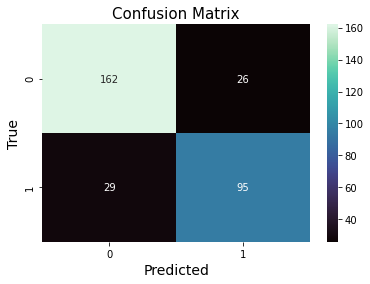

In [1403]:
sns.heatmap(confusion, cmap="mako", annot=True, fmt='g')
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
plt.title("Confusion Matrix", fontsize=15)

# 5. Cross-validation Score

In [1404]:
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


def shuffle(n):
    s = ShuffleSplit(n_splits=n, random_state=42)
    return s

def create_subsets(s, X, y):
    X_subsets = {}
    y_subsets = {}
    for i, indices in enumerate(s.split(X)):
        X_subsets[i] = X.values[indices[0], :]
        y_subsets[i] = y.values[indices[0]]
   
    return [X_subsets, y_subsets]
        

def grow_forest(s, X_subsets, y_subsets, X_test, y_test):
    forest = []
    ypreds = []
    scores = []
    # Defining the decision tree model
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2', random_state=42)

    # Growing the forest
    for subset in range(s.get_n_splits()):
        tree = clf.fit(X_subsets[subset], y_subsets[subset])    
        forest.append(tree)
    
        ypred = clf.predict(X_test.values)
        ypreds.append(ypred)
    
        scores.append(clf.score(X_test, y_test))
    
        ## Creating a plot for each tree ##
    
        # plt.figure(figsize=(12, 8), dpi=150)
        # plot_tree(clf, feature_names=X.columns, class_names=["survived", "drowned"], filled=True)
        # plt.savefig(f"plots/tree{i}.jpg")
        # plt.close()
    return forest, ypreds, scores

def random_forest(X, y, X_test, y_test):
    s = shuffle(n=1000)
    X_subsets, y_subsets = create_subsets(s, X, y)
    forest, ypreds, scores = grow_forest(s, X_subsets, y_subsets, X_test, y_test)
    return forest, ypreds, scores



In [1406]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
import statistics

rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
# print(rkf.split(df))

X_train_subsets = {}
y_train_subsets = {}
X_test_subsets = {}
y_test_subsets = {}

accuracies = []
for index, train_test in enumerate(rkf.split(df)):
    X_train_subsets[index] = df[["rank", "Sex_male", "SibSp", "cabin_number"]].values[train_test[0], :]
    X_test_subsets[index] = df[["rank", "Sex_male", "SibSp", "cabin_number"]].values[train_test[1], :]
    y_train_subsets[index] = df["Survived"].values[train_test[0]]
    y_test_subsets[index] = df["Survived"].values[train_test[1]]

high_score = dummy_accuracy
high_list = []
for subset in range(rkf.get_n_splits()):
    forest, ypreds, scores = random_forest(pd.DataFrame(X_train_subsets[subset]), pd.Series(y_train_subsets[subset]), pd.DataFrame(X_test_subsets[subset]), pd.Series(y_test_subsets[subset]))
    
    if max(scores) > high_score:
        high_score = max(scores)
        print((scores.index(max(scores))))
        high_list = [forest[scores.index(max(scores))],
                     ypreds[scores.index(max(scores))],
                     high_score]

    ballots = pd.DataFrame(ypreds)
    vote = ballots.mode().transpose()
    accuracy = accuracy_score(vote[0].values.astype(int), y_test_subsets[subset])
    accuracies.append(accuracy)
    print(accuracy)

print(statistics.median(accuracies))

961
0.8156424581005587
0.8089887640449438
50
0.8426966292134831
0.7865168539325843
0.8258426966292135
0.8044692737430168
0.8258426966292135
0.8202247191011236
0.8146067415730337
0.8089887640449438
0.8156424581005587
0.8089887640449438
0.8089887640449438
0.8089887640449438
0.8146067415730337
710
0.88268156424581
0.7696629213483146
0.8258426966292135
0.8089887640449438
0.8033707865168539
0.8324022346368715
0.8370786516853933
0.8033707865168539
0.8089887640449438
0.7921348314606742
0.8089887640449438


In [1407]:
print(high_list)

[DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       random_state=42), array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1]), 0.8994413407821229]


In [1448]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=10, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8301282051282052

In [1431]:
clf = RandomForestClassifier(criterion="entropy", n_estimators=1000, max_features='log2', max_depth=9, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.8333333333333334

In [1456]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

models = [('logreg', LogisticRegression(penalty='l2', C=10, max_iter=100, random_state=42)),
          ("forest", RandomForestClassifier(criterion="entropy", max_features='log2', n_estimators=1000, max_depth=9, random_state=42)),
          ('svm', SVC(kernel='rbf', probability=False, random_state=42)),
          ]
m = VotingClassifier(models, n_jobs=-1, voting="hard")

m.fit(X_train, y_train)
m.score(X_test, y_test)

0.8525641025641025

# 3. Evaluate your model

## 3.1. Accuracy, Precision, Recall, F1, DummyClassifiers

In [1409]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X_test), y_test)

0.8269230769230769

In [1410]:
from sklearn.metrics import precision_score
precision_score(model.predict(X_test), y_test)

0.7983870967741935

In [1411]:
from sklearn.metrics import recall_score
recall_score(model.predict(X_test), y_test)

0.7734375

In [1412]:
from sklearn.metrics import f1_score
f1_score(model.predict(X_test), y_test)

0.7857142857142857

In [1413]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(model.predict(X_train), y_train)
accuracy_score(dummy_clf.predict(X_test), y_test)

0.6025641025641025

In [1414]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(model.predict(X_train), y_train)
accuracy_score(dummy_clf.predict(X_test), y_test)

0.5288461538461539

In [1415]:
dummy_clf = DummyClassifier(strategy='uniform')
dummy_clf.fit(model.predict(X_train), y_train)
accuracy_score(dummy_clf.predict(X_test), y_test)

0.4807692307692308